# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [8]:
tickers = ['VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS', 'EMB']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [9]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [10]:
r_d_all

,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,USRT,IAU,VGLT,...,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS,EMB
1980-01-03,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,0.002987,0.001174,0.002152,0.000363,0.000556,0.004972,0.001219,0.001353,0.016011,-0.004238,...,0.003550,-0.000386,0.000000,-0.000896,-0.003695,-0.002072,-0.000466,-0.001583,0.003292,-0.000989
2024-05-20,0.000331,0.001173,-0.003578,-0.000906,0.001667,-0.001546,0.000977,-0.003685,0.004377,-0.001725,...,-0.000342,-0.000097,-0.000168,-0.000571,-0.001615,-0.000639,0.006674,-0.000616,0.000000,0.000058
2024-05-21,-0.002315,-0.000651,0.000718,-0.000907,-0.002298,-0.004026,0.002080,-0.000123,-0.001525,0.002996,...,-0.002511,0.000386,0.000841,0.000979,0.002816,0.000959,0.001873,0.001322,-0.002187,0.000408
2024-05-22,-0.004642,-0.002475,-0.002871,-0.006718,-0.006035,-0.002021,-0.002443,-0.005918,-0.018114,0.000460,...,-0.006180,-0.000482,-0.000504,-0.001141,0.000657,-0.001757,-0.000189,-0.000792,-0.005724,-0.001688


In [11]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11192 entries, 1980-01-03 to 2024-05-23
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VGTSX   7065 non-null   float64
 1   VIMSX   6544 non-null   float64
 2   VIVAX   7947 non-null   float64
 3   VISVX   6544 non-null   float64
 4   NAESX   11192 non-null  float64
 5   VWO     4834 non-null   float64
 6   SPY     7885 non-null   float64
 7   USRT    4293 non-null   float64
 8   IAU     4862 non-null   float64
 9   VGLT    3621 non-null   float64
 10  VONG    3440 non-null   float64
 11  IXUS    2912 non-null   float64
 12  VCSH    3648 non-null   float64
 13  VTIP    2918 non-null   float64
 14  VCIT    3648 non-null   float64
 15  TLT     5492 non-null   float64
 16  BNDX    2762 non-null   float64
 17  QQQ     6343 non-null   float64
 18  BND     4311 non-null   float64
 19  VXUS    3351 non-null   float64
 20  EMB     4134 non-null   float64
dtypes: float64(21)
mem

In [12]:
start_dates = fnc.start_dates(r_d_all)
start_dates

{'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'EMB': Timestamp('2007-12-20 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

As there are some assets which do not have enough data, I will filter the dataset by removing those assets so that I can at least have enough data to make some conclusions or do some reasonable backtests.

In [13]:
start_year = 2024
assets_before_start_year = [asset for asset, start_date in start_dates.items() if pd.to_datetime(start_date).year < start_year]
assets_before_start_year

['NAESX',
 'VIVAX',
 'SPY',
 'VGTSX',
 'VIMSX',
 'VISVX',
 'QQQ',
 'TLT',
 'IAU',
 'VWO',
 'BND',
 'USRT',
 'EMB',
 'VCSH',
 'VCIT',
 'VGLT',
 'VONG',
 'VXUS',
 'VTIP',
 'IXUS',
 'BNDX']

In [14]:
r_d = r_d_all[assets_before_start_year]
r_d

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
1980-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,0.000556,0.002152,0.001219,0.002987,0.001174,0.000363,-0.000466,-0.003695,0.016011,0.004972,...,0.001353,-0.000989,-0.000386,-0.000896,-0.004238,0.000000,0.003292,0.000000,0.003550,-0.002072
2024-05-20,0.001667,-0.003578,0.000977,0.000331,0.001173,-0.000906,0.006674,-0.001615,0.004377,-0.001546,...,-0.003685,0.000058,-0.000097,-0.000571,-0.001725,0.004922,0.000000,-0.000168,-0.000342,-0.000639
2024-05-21,-0.002298,0.000718,0.002080,-0.002315,-0.000651,-0.000907,0.001873,0.002816,-0.001525,-0.004026,...,-0.000123,0.000408,0.000386,0.000979,0.002996,0.002129,-0.002187,0.000841,-0.002511,0.000959
2024-05-22,-0.006035,-0.002871,-0.002443,-0.004642,-0.002475,-0.006718,-0.000189,0.000657,-0.018114,-0.002021,...,-0.005918,-0.001688,-0.000482,-0.001141,0.000460,-0.003081,-0.005724,-0.000504,-0.006180,-0.001757


In [15]:
r_d.dropna(inplace=True)
r_d

C:\Users\user\AppData\Local\Temp\ipykernel_1392\239412674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_d.dropna(inplace=True)


,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
2013-06-05,-0.011943,-0.009019,-0.010887,-0.012601,-0.011835,-0.011980,-0.012433,0.009224,0.002946,-0.016704,...,-0.006564,-0.004679,-0.000227,-0.002439,0.009457,-0.013623,-0.016852,0.000000,-0.017007,0.001193
2013-06-06,0.010010,0.006500,0.007017,0.002735,0.009863,0.008781,0.004638,-0.000407,0.008076,0.008394,...,0.012297,0.001052,-0.000341,0.003619,0.001339,0.007486,0.005649,-0.000603,0.003268,-0.001389
2013-06-07,0.008414,0.008784,0.009880,0.003636,0.011859,0.007875,0.013059,-0.011997,-0.024035,-0.003568,...,-0.003989,-0.003831,0.000796,-0.003021,-0.013974,0.012427,0.005617,-0.002014,0.007281,-0.001989
2013-06-10,0.002040,0.000256,0.000000,0.000453,-0.000689,0.002056,0.000390,-0.003183,0.005224,-0.011536,...,-0.002731,-0.007010,0.000000,-0.003911,-0.004437,0.000000,-0.000771,0.000000,-0.000190,-0.007173
2013-06-11,-0.009808,-0.006912,-0.008035,-0.009054,-0.010349,-0.010260,-0.009501,0.007924,-0.005197,-0.016098,...,-0.012960,-0.014994,-0.001249,-0.002454,0.005818,-0.007593,-0.012915,-0.002018,-0.012747,-0.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17,0.000556,0.002152,0.001219,0.002987,0.001174,0.000363,-0.000466,-0.003695,0.016011,0.004972,...,0.001353,-0.000989,-0.000386,-0.000896,-0.004238,0.000000,0.003292,0.000000,0.003550,-0.002072
2024-05-20,0.001667,-0.003578,0.000977,0.000331,0.001173,-0.000906,0.006674,-0.001615,0.004377,-0.001546,...,-0.003685,0.000058,-0.000097,-0.000571,-0.001725,0.004922,0.000000,-0.000168,-0.000342,-0.000639
2024-05-21,-0.002298,0.000718,0.002080,-0.002315,-0.000651,-0.000907,0.001873,0.002816,-0.001525,-0.004026,...,-0.000123,0.000408,0.000386,0.000979,0.002996,0.002129,-0.002187,0.000841,-0.002511,0.000959
2024-05-22,-0.006035,-0.002871,-0.002443,-0.004642,-0.002475,-0.006718,-0.000189,0.000657,-0.018114,-0.002021,...,-0.005918,-0.001688,-0.000482,-0.001141,0.000460,-0.003081,-0.005724,-0.000504,-0.006180,-0.001757


<Axes: title={'center': 'Annualized Returns'}>

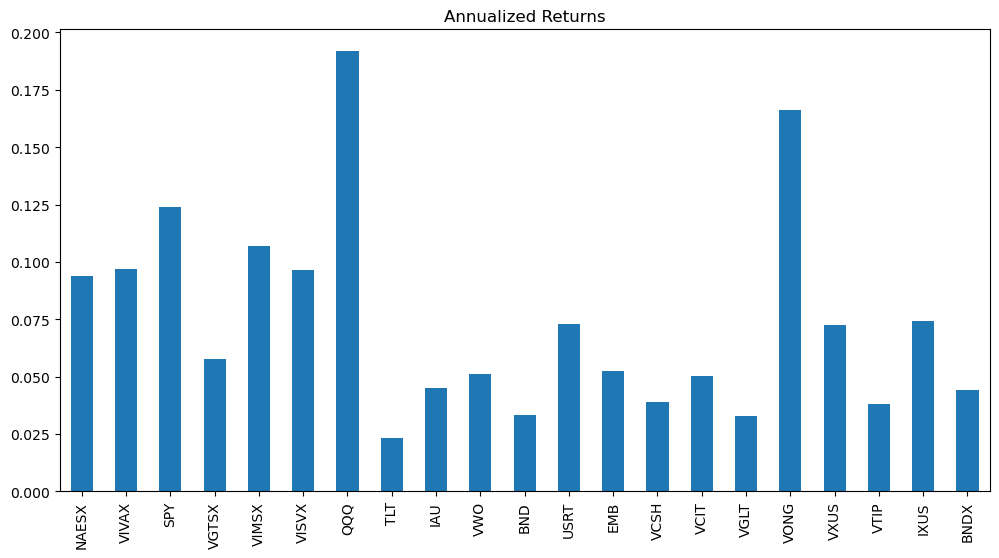

In [16]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

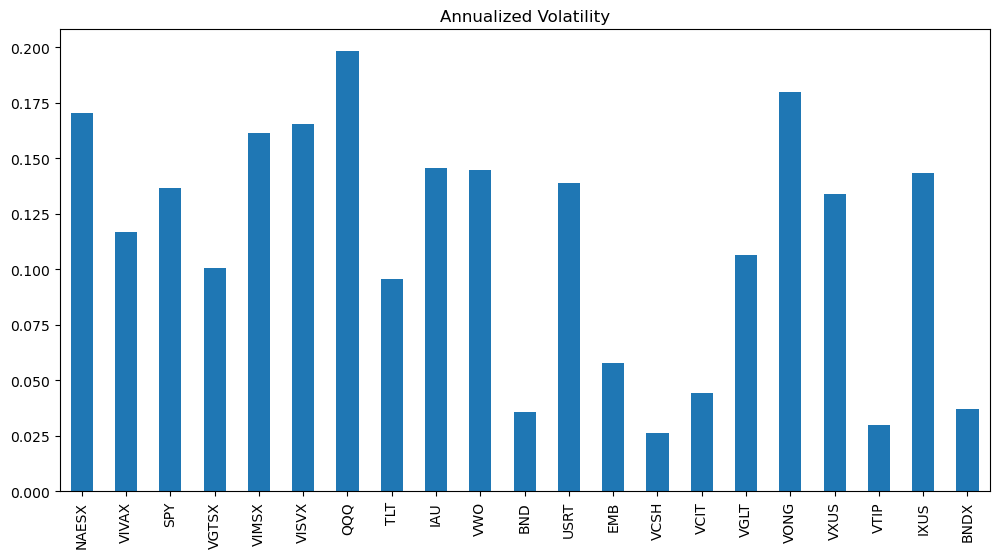

In [17]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

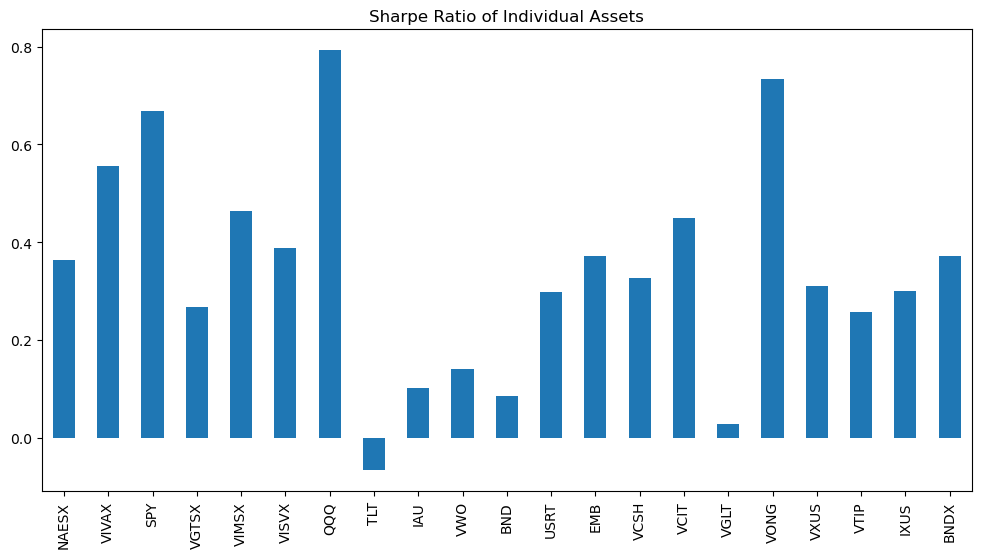

In [18]:
fnc.sharpe_ratio(r_d, 0.03, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [19]:
import seaborn as sns

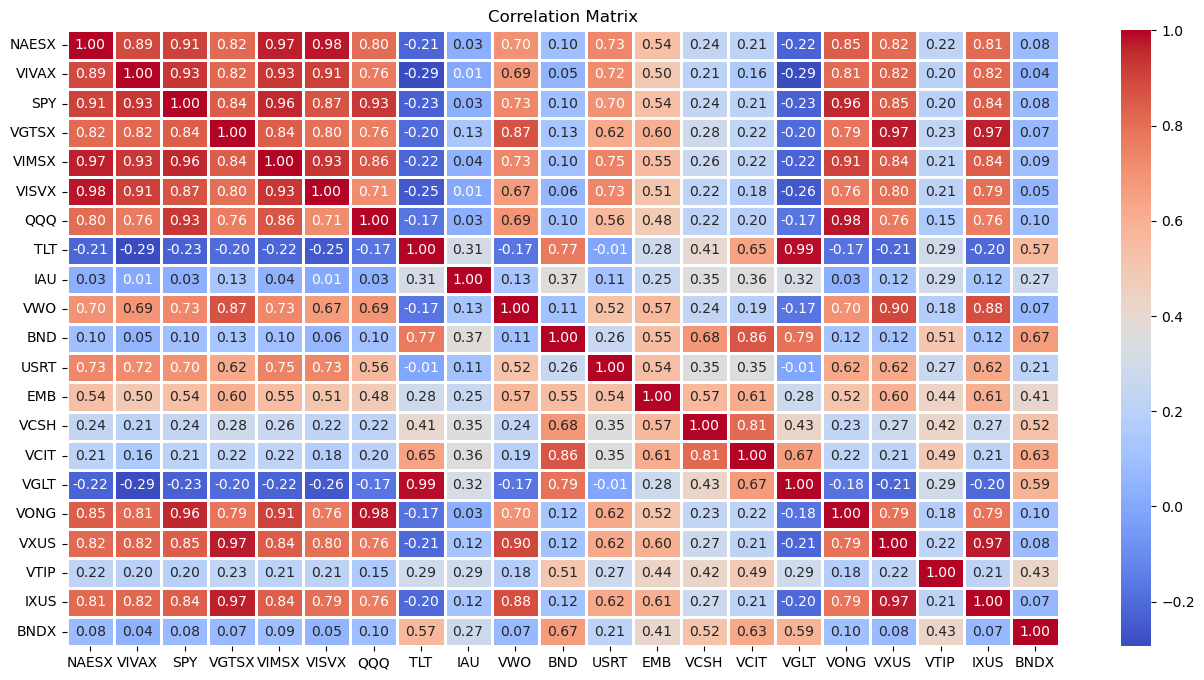

In [20]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [21]:
r_d.corr().describe()

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.535692,0.509179,0.544783,0.540945,0.552391,0.509688,0.501371,0.139231,0.205038,0.487515,...,0.489627,0.521842,0.392410,0.412886,0.141943,0.524466,0.539860,0.316186,0.538365,0.291749
std,0.412801,0.430750,0.425673,0.395644,0.421205,0.416043,0.385609,0.437978,0.224183,0.361699,...,0.271280,0.154023,0.216038,0.265867,0.443393,0.394846,0.401928,0.190841,0.399479,0.276342
min,-0.219521,-0.293562,-0.231779,-0.201367,-0.220350,-0.255286,-0.171712,-0.293249,0.006082,-0.171497,...,-0.008314,0.254011,0.210898,0.155802,-0.293562,-0.175726,-0.214826,0.151569,-0.204481,0.041406
25%,0.210733,0.155802,0.196516,0.222886,0.210679,0.179570,0.151569,-0.212364,0.031829,0.180315,...,0.272344,0.482036,0.240778,0.210733,-0.214826,0.177060,0.212530,0.210679,0.212915,0.075831
50%,0.727572,0.719364,0.729837,0.758930,0.746679,0.714535,0.692573,-0.168890,0.129468,0.668986,...,0.563664,0.539172,0.283952,0.222886,-0.171497,0.701439,0.763118,0.227288,0.759514,0.103700
75%,0.846888,0.823842,0.906223,0.843851,0.906145,0.796994,0.763118,0.406552,0.308317,0.727791,...,0.699218,0.568789,0.428342,0.626190,0.428342,0.812785,0.844808,0.421642,0.841595,0.524079
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

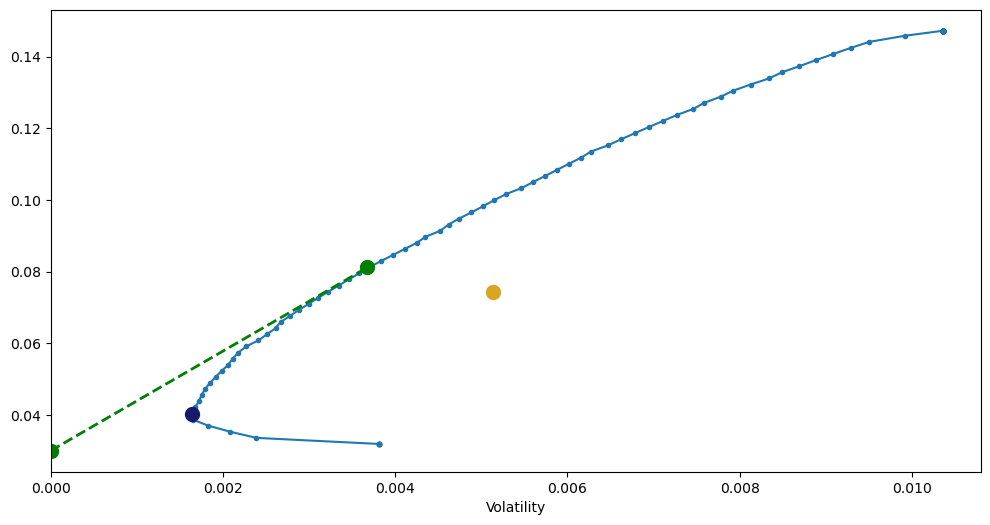

In [22]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_ew= True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.25) #max allocation for each asset = 25%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [23]:
target_rets = [0.06, 0.08, 0.10, 0.12, annu_r.mean()]
backtest = fnc.combined_backtesting_result(r_d, portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=900,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight= 0.20, riskfree_rate=0.03,
                                              target_returns=target_rets, weight_constraints = 1)

In [24]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
2016-12-29                0.001173      1001.17276  0.000000   1001.172760   
2016-12-30                0.000715     1001.889037  0.000000   1001.889037   
2017-01-03               -0.000385     1001.503393 -0.000385   1001.889037   
2017-01-04                0.001008     1002.513397  0.000000   1002.513397   
2017-01-05                0.001222     1003.738316  0.000000   1003.738316   
...                            ...             ...       ...           ...   
2024-05-17               -0.000796     1366.276295 -0.001400   1368.191767   
2024-05-20               -0.000486     1365.612542 -0.001885   1368.191767   
2024-05-21                0.000805     1366.711697 -0.001082   1368.191767   
2024-05-22               -0.001077     1365.239206 -0.002158   1368.191767   
2024-05-23               -0.001750     1362.850099 -0.003904   1368.191767   

                                                               \
                                                      Weights   
2016-12-29  {'NAESX': 3.122744631966631e-10, 'VIVAX': 0.09...   
2016-12-30  {'NAESX': 3.122744631966631e-10, 'VIVAX': 0.09...   
2017-01-03  {'NAESX': 3.122744631966631e-10, 'VIVAX': 0.09...   
2017-01-04  {'NAESX': 3.122744631966631e-10, 'VIVAX': 0.09...   
2017-01-05  {'NAESX': 3.122744631966631e-10, 'VIVAX': 0.09...   
...                                                       ...   
2024-05-17  {'NAESX': 2.4643387135969143e-09, 'VIVAX': 0.0...   
2024-05-20  {'NAESX': 2.4643387135969143e-09, 'VIVAX': 0.0...   
2024-05-21  {'NAESX': 2.4643387135969143e-09, 'VIVAX': 0.0...   
2024-05-22  {'NAESX': 2.4643387135969143e-09, 'VIVAX': 0.0...   
2024-05-23  {'NAESX': 2.4643387135969143e-09, 'VIVAX': 0.0...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.001228     1001.228473  0.000000   1001.228473   
2016-12-30            -0.000961     1000.266669 -0.000961   1001.228473   
2017-01-03             0.000952      1001.21937 -0.000009   1001.228473   
2017-01-04             0.002637     1003.859298  0.000000   1003.859298   
2017-01-05             0.002596     1006.465629  0.000000   1006.465629   
...                         ...             ...       ...           ...   
2024-05-17            -0.000759     1591.133676 -0.001572   1593.639203   
2024-05-20             0.001111     1592.901969 -0.000463   1593.639203   
2024-05-21             0.001032     1594.546589  0.000000   1594.546589   
2024-05-22            -0.000852     1593.188567 -0.000852   1594.546589   
2024-05-23            -0.002003     1589.996907 -0.002853   1594.546589   

                                                               ...  \
                                                      Weights  ...   
2016-12-29  {'NAESX': 1.4884675424999955e-10, 'VIVAX': 0.0...  ...   
2016-12-30  {'NAESX': 1.4884675424999955e-10, 'VIVAX': 0.0...  ...   
2017-01-03  {'NAESX': 1.4884675424999955e-10, 'VIVAX': 0.0...  ...   
2017-01-04  {'NAESX': 1.4884675424999955e-10, 'VIVAX': 0.0...  ...   
2017-01-05  {'NAESX': 1.4884675424999955e-10, 'VIVAX': 0.0...  ...   
...                                                       ...  ...   
2024-05-17  {'NAESX': 9.83037975195006e-12, 'VIVAX': 0.0, ...  ...   
2024-05-20  {'NAESX': 9.83037975195006e-12, 'VIVAX': 0.0, ...  ...   
2024-05-21  {'NAESX': 9.83037975195006e-12, 'VIVAX': 0.0, ...  ...   
2024-05-22  {'NAESX': 9.83037975195006e-12, 'VIVAX': 0.0, ...  ...   
2024-05-23  {'NAESX': 9.83037975195006e-12, 'VIVAX': 0.0, ...  ...   

           Target Returns 12.0%                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.000256     1000.256324  0.000000   1000.256324   
2016-12-30            -0.004884      9

In [25]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [26]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_1392\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [27]:
fnc.summary_stats(rets, periods_per_year=252, riskfree_rate= 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.042788,0.032054,-1.205718,32.389988,0.002592,0.004389,0.387372,-0.077196,-2702 days
Maximum Sharpe Ratio,0.064772,0.059535,-0.563700,11.246493,0.005865,0.009011,0.567114,-0.172429,-2702 days
Equally Weighted,0.081136,0.088657,-1.098825,18.815349,0.008694,0.013217,0.560048,-0.179680,-2702 days
Target Returns 6.0%,0.080938,0.070697,-0.330735,11.602721,0.006641,0.010337,0.699602,-0.170986,-2702 days
Target Returns 8.0%,0.102040,0.099455,-0.153936,10.640693,0.009203,0.014507,0.703326,-0.211896,-2702 days
Target Returns 10.0%,0.106450,0.137573,-0.836103,15.600903,0.013554,0.020836,0.539576,-0.238107,-2702 days
Target Returns 12.0%,0.122054,0.155628,-0.916589,15.168151,0.015608,0.023980,0.574329,-0.258692,-2702 days
Target Returns 7.440751509399399%,0.098889,0.092162,-0.040974,10.985842,0.008288,0.013378,0.725793,-0.202827,-2702 days
S&P500,0.123196,0.189580,-0.548804,18.027826,0.017279,NaN,0.477502,-0.339250,-2701 days


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

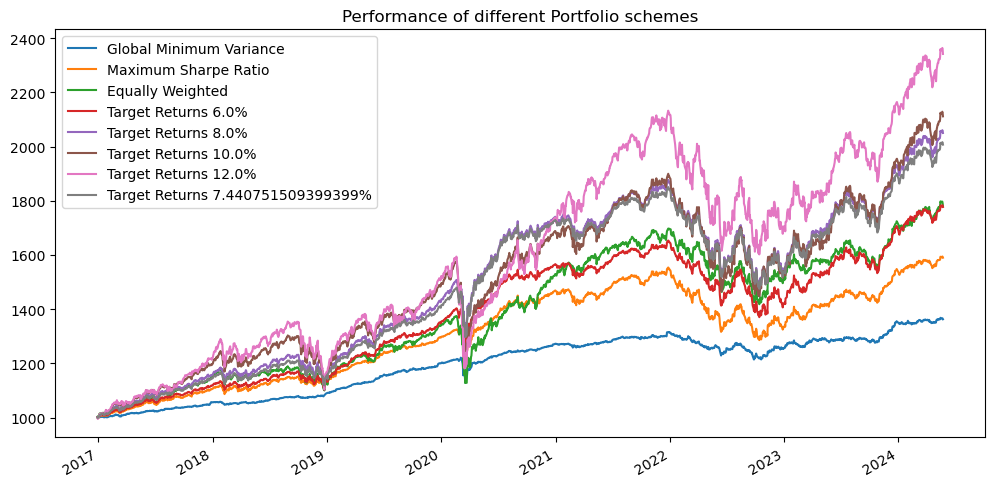

In [28]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [29]:
weights_change = fnc.weights_change(weights)

In [30]:
weights_mean = fnc.weights_mean(weights_change)
weights_mean

,Global Minimum Variance,Maximum Sharpe Ratio,Equally Weighted,Target Returns 6.0%,Target Returns 8.0%,Target Returns 10.0%,Target Returns 12.0%,Target Returns 7.440751509399399%
NAESX,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.015111,0.000000
VIVAX,0.055957,0.027724,0.047619,0.018101,0.027349,0.062114,0.060686,0.023110
SPY,0.000000,0.000000,0.047619,0.005447,0.071414,0.171499,0.200000,0.045349
VGTSX,0.011817,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VIMSX,0.000000,0.000000,0.047619,0.000000,0.000000,0.078564,0.176351,0.000000
VISVX,0.000000,0.001536,0.047619,0.003275,0.009667,0.037415,0.071096,0.009254
QQQ,0.000000,0.182384,0.047619,0.187357,0.200000,0.200000,0.200000,0.199062
TLT,0.000000,0.002906,0.047619,0.016729,0.030885,0.046542,0.015123,0.025781
IAU,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VWO,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000


So far I have done a fine numbers of analysis, and what I think will suit best to me right now is a target returns portfolio, whether it's the mean of annual returns or a specific target return. Global minimum variance tends to focus too much on non volatile assets and if I regulate the max asset weight too much it tends to work poorly or very similiar to equally weighted. Maximum sharpe ratio is also fine but it's historical returns are not as good and if I am choosing something other than GMV, I would like to target a bit bigger returns.

I know these returns aren't as good but relative to the volatility of the portfolios they seem great. I would like do some advanced level portfolio contruction later, the main problem I faced here was choosing assets and having enough data to backtest, maybe there are advanced ways to filter markets and select a good number of assets which meets my criteria, but right now historical data is a problem too.

In future if I learn a way to create alpha then maybe it will be much better. But still I think these analysis are great and can be of good use.

## IBKR Execution

In [31]:
ib = IB()

In [ ]:
ib.connect()

In [33]:
ib.positions()

[]

In [34]:
assets = annu_r.index
weights = fnc.minimize_vol(target_return=0.08, er = annu_r, cov = cov, max_asset_weight=0.2)

In [35]:
contracts = []
for asset in assets:
    contract = Stock(asset, "SMART", "USD")
    contracts.append(contract)

In [36]:
contracts

[Stock(symbol='NAESX', exchange='SMART', currency='USD'),
 Stock(symbol='VIVAX', exchange='SMART', currency='USD'),
 Stock(symbol='SPY', exchange='SMART', currency='USD'),
 Stock(symbol='VGTSX', exchange='SMART', currency='USD'),
 Stock(symbol='VIMSX', exchange='SMART', currency='USD'),
 Stock(symbol='VISVX', exchange='SMART', currency='USD'),
 Stock(symbol='QQQ', exchange='SMART', currency='USD'),
 Stock(symbol='TLT', exchange='SMART', currency='USD'),
 Stock(symbol='IAU', exchange='SMART', currency='USD'),
 Stock(symbol='VWO', exchange='SMART', currency='USD'),
 Stock(symbol='BND', exchange='SMART', currency='USD'),
 Stock(symbol='USRT', exchange='SMART', currency='USD'),
 Stock(symbol='EMB', exchange='SMART', currency='USD'),
 Stock(symbol='VCSH', exchange='SMART', currency='USD'),
 Stock(symbol='VCIT', exchange='SMART', currency='USD'),
 Stock(symbol='VGLT', exchange='SMART', currency='USD'),
 Stock(symbol='VONG', exchange='SMART', currency='USD'),
 Stock(symbol='VXUS', exchange='S

In [38]:
data = ib.reqMktData(contracts[2])

ConnectionError: Not connected